# IFT888 - Question 1 partie 3

* Entraîner un modèle de régression polynomiale à biais ou variance élevée

Le code de base est tiré du TP1 du cours IFT603 puis adapté pour les besoins de ces démonstrations.
Premièrement, un peu de "poutine" pour charger les librairies et les données

In [239]:
'''
 Imporation des bibliothèques
'''
import numpy as np
import sys
import solution_regression as sr
import gestion_donnees as gd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Puis, on défini quelques paramètres

In [246]:
# Paramètres de l'expérience
modele_gen = "tanh"
nb_train = 100
nb_test = 20
bruit = 0.5
w = [0.5, 10]  # Parametres du modele generatif

Générons les données:

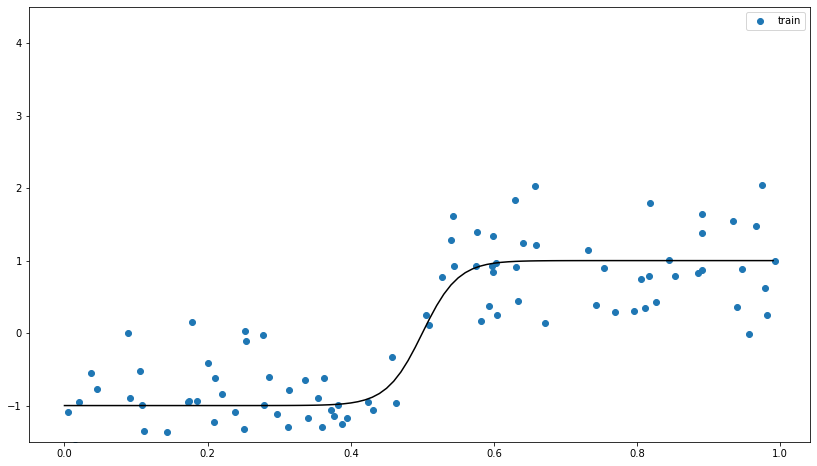

In [247]:
# Creer le gestionnaire de donnees et generer les donnees d'entraînement et de test
gestionnaire_donnees = gd.GestionDonnees(w, modele_gen, nb_train, nb_test, bruit)
[x_train, t_train, x_test, t_test] = gestionnaire_donnees.generer_donnees()

gestionnaire_donnees.afficher_donnees_et_modele(x_train, t_train, True, "train")

plt.legend()
plt.show()

Puis, définissons le modèle:

In [248]:
def train_and_test(m, lamb, title):
    # Entrainement du modele de regression

    regression = sr.Regression(lamb, m)
    regression.entrainement(x_train, t_train, using_sklearn=False)

    # Predictions sur les ensembles d'entrainement et de test
    predictions_train = np.array([regression.prediction(x) for x in x_train])
    predictions_test = np.array([regression.prediction(x) for x in x_test])

    # Calcul des erreurs
    erreurs_entrainement = np.array([regression.erreur(t_n, p_n)
                                     for t_n, p_n in zip(t_train, predictions_train)])
    erreurs_test = np.array([regression.erreur(t_n, p_n)
                             for t_n, p_n in zip(t_test, predictions_test)])

    print("Erreur d'entraînement :", "%.2f" % erreurs_entrainement.mean())
    print("Erreur de test :", "%.2f" % erreurs_test.mean())
    print("")

    # Affichage
    gestionnaire_donnees.afficher_donnees_et_modele(x_train, t_train, True, label="train")
    gestionnaire_donnees.afficher_donnees_et_modele(x_test, t_test, True, label="test")
    predictions_range = np.array([regression.prediction(x) for x in np.arange(0, 1, 0.01)])
    gestionnaire_donnees.afficher_donnees_et_modele(np.arange(0, 1, 0.01), predictions_range, False, label="prédictions")

    plt.title(title)
    plt.legend()
    plt.show()

Maintenant, entraînons un modèle à biais élevé:

Erreur d'entraînement : 0.48
Erreur de test : 0.35



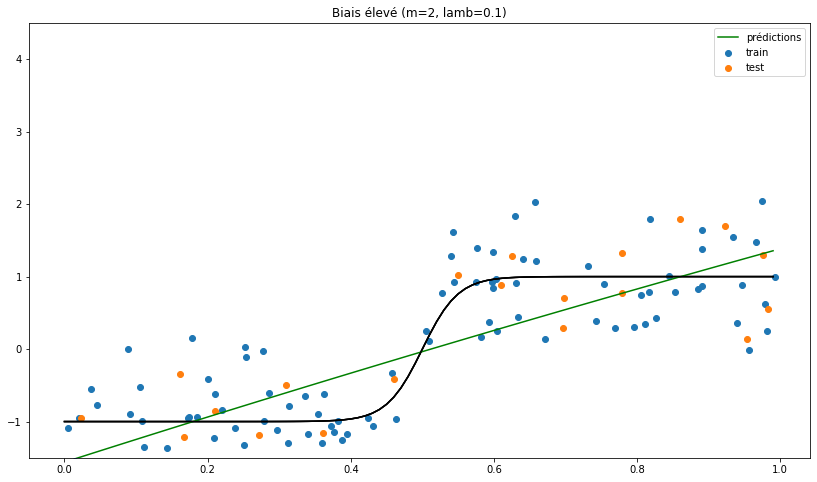

In [249]:
train_and_test(2, 0.1, "Biais élevé (m=2, lamb=0.1)")

Puis, un modèle à variance (comiquement) élevée

Erreur d'entraînement : 0.23
Erreur de test : 0.35



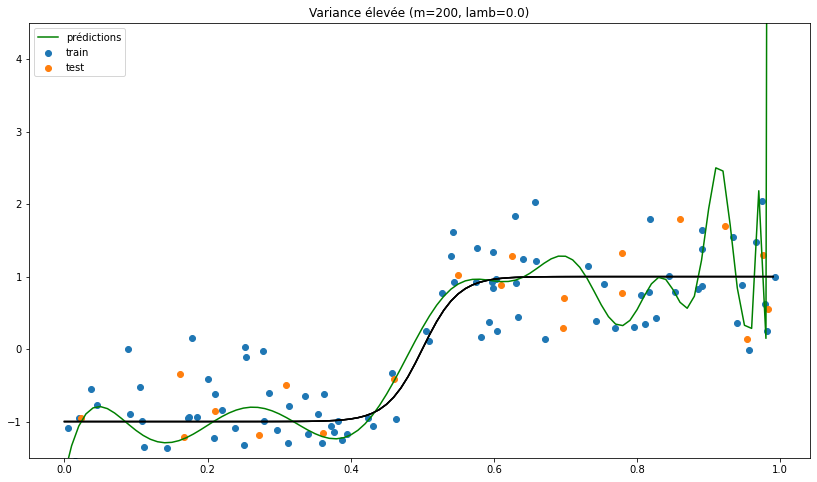

In [250]:
train_and_test(200, 0.0, "Variance élevée (m=200, lamb=0.0)")

Finalement, une recherche d'hyperparamètres est effectuée pour trouver les meilleurs $m$ et $\lambda$:

M trouvé: 29
lamb trouvé: 0.0001
Erreur d'entraînement : 0.32
Erreur de test : 0.24



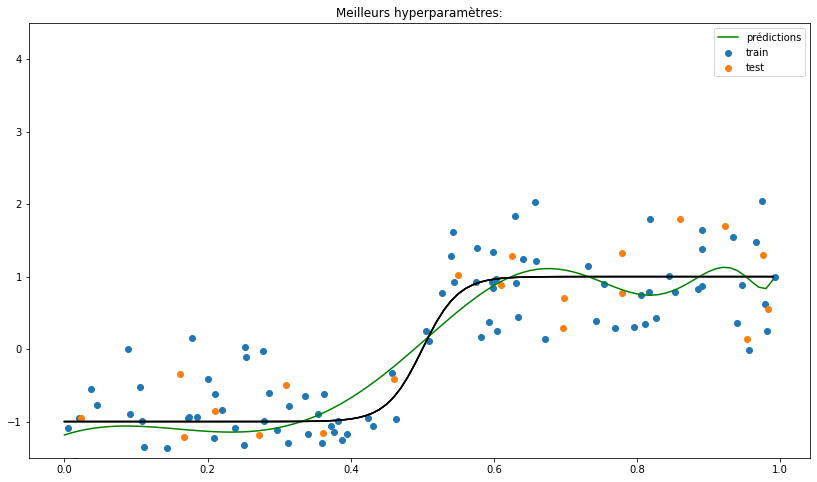

In [254]:
train_and_test(-1, 0.0000001, "Meilleurs hyperparamètres:")